<a href="https://colab.research.google.com/github/prasanna2019/StockDataAnalysis/blob/main/Share_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Stock Price Data Analysis and Forecasting**
Welcome to this Colab notebook on stock price data analysis and forecasting. In this notebook, we will explore various techniques and models to analyze and predict the future prices of a stock using historical data. Our dataset contains daily stock prices of HZNC stocks over a 10-year period (2013-2024), including columns for Date, Price, Open, High, Low, Volume (Vol.), and Change %.

Lets us start by getting the data from url and performing some basic tasks to understand it.

In [62]:
import pandas as pd
import numpy as np
import plotly.express as ex
import matplotlib.pyplot as plt

In [2]:
df= pd. read_csv('https://raw.githubusercontent.com/prasanna2019/StockDataAnalysis/main/HZNC%20Historical%20Data.csv', parse_dates=['Date'], dayfirst= True, index_col='Date')
df.head(4)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-05-22,781.55,778.00,804.9,767.90,8.77M,5.10%
2024-05-21,743.60,632.80,743.6,626.15,15.46M,19.99%
2024-05-18,619.70,596.00,619.7,596.00,1.09M,5.00%
2024-05-17,590.20,584.75,619.1,578.40,6.52M,1.18%


In [3]:
df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [4]:
df.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [5]:
df[df['Vol.'].isna()]

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-10-27,216.95,216.95,216.95,216.95,NaN,2.77%


We will delete the row where the Volume column is NaN.

In [6]:
df.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [7]:
df_ready= df.dropna()

In [8]:
df_ready.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

We have dropped the row with missing Volumn value. Our new dataframe df_ready is ready for analysis.

First,let us find out what was the highest and lowest price of this stock.

In [9]:
df_ready['High'].max(), df_ready['High'].idxmax()

(804.9, Timestamp('2024-05-22 00:00:00'))

In [10]:
df_ready['Low'].min(), df_ready['High'].idxmin()

(90.53, Timestamp('2014-02-28 00:00:00'))

In [11]:
df_ready.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-05-22,781.55,778.00,804.9,767.90,8.77M,5.10%
2024-05-21,743.60,632.80,743.6,626.15,15.46M,19.99%
2024-05-18,619.70,596.00,619.7,596.00,1.09M,5.00%
2024-05-17,590.20,584.75,619.1,578.40,6.52M,1.18%
2024-05-16,583.30,566.50,589.0,556.50,5.21M,4.00%


Let us see the standard deviation of the price. In the context of stock price, standard deviation is considered to be a good measure to determine the risk in the investment of stocks.

In [12]:
df['Price'].std()

81.08805862022923

High standard deviation means the value of price fluctuates over a period of time.
But first let us consider std of each year to get better understanding.

In [13]:
df_2013= df.loc[df.index.year==2014]
df_2023= df.loc[df.index.year==2023]
df_2022= df.loc[df.index.year==2022]

In [14]:
df_2023['Price'].std()

13.321426776333901

In [15]:
df_2022['Price'].std()

24.076536652524545

From the values of std of year 2023 and 2022, it can be seen that this stock is not very risky as it has low volitility.

In [16]:
df_2023['Price']

Date
2023-12-29    318.05
2023-12-28    312.60
2023-12-27    311.95
2023-12-26    311.70
2023-12-22    309.90
               ...  
2023-01-06    332.80
2023-01-05    337.70
2023-01-04    332.05
2023-01-03    331.65
2023-01-02    325.10
Name: Price, Length: 246, dtype: float64

In [17]:
(df_2023)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-12-29,318.05,313.70,322.05,313.70,1.52M,1.74%
2023-12-28,312.60,312.10,317.50,311.00,1.64M,0.21%
2023-12-27,311.95,312.00,313.25,310.35,306.30K,0.08%
2023-12-26,311.70,311.05,312.90,310.00,311.19K,0.58%
2023-12-22,309.90,305.05,312.00,305.05,480.18K,1.11%
...,...,...,...,...,...,...
2023-01-06,332.80,337.70,338.45,330.30,330.91K,-1.45%
2023-01-05,337.70,334.55,340.55,333.30,1.19M,1.70%
2023-01-04,332.05,332.50,333.95,330.35,638.13K,0.12%


In [18]:
df_2023= df_2023.sort_index()


In [19]:
df_2023['rolling_std']= df_2023['Price'].rolling(window=30).std()
df_2023['rolling_std']

Date
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06         NaN
                ...   
2023-12-22    9.743586
2023-12-26    9.610947
2023-12-27    9.528551
2023-12-28    9.354204
2023-12-29    9.335220
Name: rolling_std, Length: 246, dtype: float64

In [20]:
df['rolling_std']= df['Price'].rolling(window=252).std()

In [21]:
fig = ex.line(df_2023, x=df_2023.index, y=['Price', 'rolling_std'],
              labels={'value': 'Price / Standard Deviation', 'variable': 'Metric'},
              title='Stock Prices and Rolling Standard Deviation for 2023')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Metric'
)

fig.show()

This is for the year 2023. Now let us check for the span of 10 years

In [22]:
fig = ex.line(df, x=df.index, y=['Price', 'rolling_std'],
              labels={'value': 'Price / Standard Deviation', 'variable': 'Metric'},
              title='Stock Prices and Rolling Standard Deviation')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Metric'
)

fig.show()

As seen from the chart, the stock has low volatility although between 2022 and 2024 it has seen a spike

In [23]:
df['month']= df.index.month_name()
df['difference']= df['High']- df['Low']
df.head()

,Price,Open,High,Low,Vol.,Change %,rolling_std,month,difference
Date,,,,,,,,,
2024-05-22,781.55,778.00,804.9,767.90,8.77M,5.10%,NaN,May,37.00
2024-05-21,743.60,632.80,743.6,626.15,15.46M,19.99%,NaN,May,117.45
2024-05-18,619.70,596.00,619.7,596.00,1.09M,5.00%,NaN,May,23.70
2024-05-17,590.20,584.75,619.1,578.40,6.52M,1.18%,NaN,May,40.70
2024-05-16,583.30,566.50,589.0,556.50,5.21M,4.00%,NaN,May,32.50


In [24]:
df.nlargest(5, 'difference')

,Price,Open,High,Low,Vol.,Change %,rolling_std,month,difference
Date,,,,,,,,,
2024-05-21,743.60,632.80,743.60,626.15,15.46M,19.99%,NaN,May,117.45
2024-05-13,579.10,529.00,586.00,506.80,25.34M,9.37%,NaN,May,79.20
2024-05-10,529.50,460.95,539.65,460.95,28.22M,16.08%,NaN,May,78.70
2024-04-09,398.40,346.10,408.00,344.05,21.02M,15.68%,NaN,April,63.95
2022-03-02,351.75,311.40,360.00,311.40,9.27M,12.76%,26.761072,March,48.60


In [25]:
df_difference_sort= df.sort_values('difference', ascending= False)
df_difference_sort.head()

,Price,Open,High,Low,Vol.,Change %,rolling_std,month,difference
Date,,,,,,,,,
2024-05-21,743.60,632.80,743.60,626.15,15.46M,19.99%,NaN,May,117.45
2024-05-13,579.10,529.00,586.00,506.80,25.34M,9.37%,NaN,May,79.20
2024-05-10,529.50,460.95,539.65,460.95,28.22M,16.08%,NaN,May,78.70
2024-04-09,398.40,346.10,408.00,344.05,21.02M,15.68%,NaN,April,63.95
2022-03-02,351.75,311.40,360.00,311.40,9.27M,12.76%,26.761072,March,48.60


In [26]:
df= df.sort_index()
df

,Price,Open,High,Low,Vol.,Change %,rolling_std,month,difference
Date,,,,,,,,,
2014-01-01,104.02,105.52,106.07,103.86,552.40K,-0.45%,15.105740,January,2.21
2014-01-02,102.72,104.89,105.60,102.36,1.09M,-1.25%,15.083768,January,3.24
2014-01-03,103.94,102.72,105.40,101.77,1.41M,1.19%,15.050633,January,3.63
2014-01-06,100.71,103.00,103.71,99.56,1.65M,-3.11%,15.022306,January,4.15
2014-01-07,99.45,100.94,101.62,98.18,1.51M,-1.25%,14.981723,January,3.44
...,...,...,...,...,...,...,...,...,...
2024-05-16,583.30,566.50,589.00,556.50,5.21M,4.00%,NaN,May,32.50
2024-05-17,590.20,584.75,619.10,578.40,6.52M,1.18%,NaN,May,40.70
2024-05-18,619.70,596.00,619.70,596.00,1.09M,5.00%,NaN,May,23.70


As it is seen from the above data, this stock fluctuates the most in a day in the month of May/ April

In [27]:
df['price change']= df['Price'].diff()
df

,Price,Open,High,Low,Vol.,Change %,rolling_std,month,difference,price change
Date,,,,,,,,,,
2014-01-01,104.02,105.52,106.07,103.86,552.40K,-0.45%,15.105740,January,2.21,NaN
2014-01-02,102.72,104.89,105.60,102.36,1.09M,-1.25%,15.083768,January,3.24,-1.30
2014-01-03,103.94,102.72,105.40,101.77,1.41M,1.19%,15.050633,January,3.63,1.22
2014-01-06,100.71,103.00,103.71,99.56,1.65M,-3.11%,15.022306,January,4.15,-3.23
2014-01-07,99.45,100.94,101.62,98.18,1.51M,-1.25%,14.981723,January,3.44,-1.26
...,...,...,...,...,...,...,...,...,...,...
2024-05-16,583.30,566.50,589.00,556.50,5.21M,4.00%,NaN,May,32.50,22.45
2024-05-17,590.20,584.75,619.10,578.40,6.52M,1.18%,NaN,May,40.70,6.90
2024-05-18,619.70,596.00,619.70,596.00,1.09M,5.00%,NaN,May,23.70,29.50


In [28]:
df.nlargest(5, 'price change')

,Price,Open,High,Low,Vol.,Change %,rolling_std,month,difference,price change
Date,,,,,,,,,,
2024-05-21,743.60,632.80,743.60,626.15,15.46M,19.99%,NaN,May,117.45,123.90
2024-05-10,529.50,460.95,539.65,460.95,28.22M,16.08%,NaN,May,78.70,73.35
2024-04-09,398.40,346.10,408.00,344.05,21.02M,15.68%,NaN,April,63.95,54.00
2024-05-13,579.10,529.00,586.00,506.80,25.34M,9.37%,NaN,May,79.20,49.60
2021-10-18,387.65,372.00,408.60,367.50,8.78M,11.81%,27.473463,October,41.10,40.95


As seen from above data, the highest price increase happenned in 2014 in the month of May. Also, the first quarter is usually the time when the price change occurs.

In [29]:
def yearly_monthly_data(year, isYearly= False, month=1):
  if(isYearly):
    return df.loc[str(year)+"-01"+"-01": str(year)+"-12"+"-31",:]
  if(month==2):
    return df.loc[str(year)+"-0"+str(month)+"-01": str(year)+"-0"+str(month)+"-28",:]
  else:
    return df.loc[str(year)+"-0"+str(month)+"-01": str(year)+"-0"+str(month)+"-30",:]


data= yearly_monthly_data(2024,False,3)
data1= yearly_monthly_data(2021,True)
data1


,Price,Open,High,Low,Vol.,Change %,rolling_std,month,difference,price change
Date,,,,,,,,,,
2021-01-01,239.05,239.15,240.00,237.20,658.54K,0.00%,22.310323,January,2.80,0.00
2021-01-04,244.05,241.00,245.85,240.50,886.74K,2.09%,21.797247,January,5.35,5.00
2021-01-05,256.90,244.40,259.00,243.15,3.89M,5.27%,21.328503,January,15.85,12.85
2021-01-06,275.10,257.25,279.90,256.95,8.44M,7.08%,20.998479,January,22.95,18.20
2021-01-07,308.15,281.00,328.40,280.05,5.20M,12.01%,20.847379,January,48.35,33.05
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,315.45,313.60,316.50,310.80,381.50K,0.57%,23.954692,December,5.70,1.80
2021-12-28,317.00,317.00,318.00,316.00,244.34K,0.49%,23.974026,December,2.00,1.55
2021-12-29,315.70,318.80,320.30,315.05,362.91K,-0.41%,24.002349,December,5.25,-1.30


Now we will make get common dates for the years 2021, 2022 and 2023 by performing inner join. First let us get three separate dataframes for these years with common index.

In [34]:
df_2021= yearly_monthly_data(2021, True)
month_day= df_2021.index
dates= pd.Series(month_day)
dates_data= dates.apply(lambda x: str(x)[5:10])
new_df_2021= pd.DataFrame(dates_data.values, index= df_2021.index, columns= [dates_data.name])

#df_2021['month_day']= dates_data


In [35]:
new_df_2021['Price_2021']= df_2021['Price']
new_df_2021.set_index('Date', inplace= True, drop= True)
new_df_2021

,Price_2021
Date,
01-01,239.05
01-04,244.05
01-05,256.90
01-06,275.10
01-07,308.15
...,...
12-27,315.45
12-28,317.00
12-29,315.70


In [40]:
df_2022= yearly_monthly_data(2022, True)
df_2023= yearly_monthly_data(2023, True)
df_2022.head()
month_day= df_2022.index
dates= pd.Series(month_day)
dates_data= dates.apply(lambda x: str(x)[5:10])
new_df_2022= pd.DataFrame(dates_data.values, index= df_2022.index, columns= [dates_data.name])
new_df_2022['Price_2022']= df_2022['Price']
new_df_2022.set_index('Date', inplace= True, drop= True)
new_df_2022

,Price_2022
Date,
01-03,319.60
01-04,330.55
01-05,331.95
01-06,331.45
01-07,333.00
...,...
12-26,314.05
12-27,321.60
12-28,324.25


In [43]:
df_2023= yearly_monthly_data(2023, True)
df_2023.head()
month_day= df_2023.index
dates= pd.Series(month_day)
dates_data= dates.apply(lambda x: str(x)[5:10])
new_df_2023= pd.DataFrame(dates_data.values, index= df_2023.index, columns= [dates_data.name])
new_df_2023['Price_2023']= df_2023['Price']
new_df_2023.set_index('Date', inplace= True, drop= True)
new_df_2023

,Price_2023
Date,
01-02,325.10
01-03,331.65
01-04,332.05
01-05,337.70
01-06,332.80
...,...
12-22,309.90
12-26,311.70
12-27,311.95


In [46]:
df_join= new_df_2021.join(new_df_2022,how= "inner")
df_join

,Price_2021,Price_2022
Date,,
01-04,244.05,330.55
01-05,256.90,331.95
01-06,275.10,331.45
01-07,308.15,333.00
01-11,292.25,326.75
...,...,...
12-23,315.05,313.15
12-27,315.45,321.60
12-28,317.00,324.25


In [50]:
df_all= df_join.join(new_df_2023,how= "inner")
df_all

,Price_2021,Price_2022,Price_2023
Date,,,
01-04,244.05,330.55,332.05
01-05,256.90,331.95,337.70
01-06,275.10,331.45,332.80
01-11,292.25,326.75,339.40
01-12,290.65,330.70,345.10
...,...,...,...
12-21,312.85,323.35,306.50
12-22,312.15,320.20,309.90
12-27,315.45,321.60,311.95


# Now we have the dataframe with prices for 2021, 2022 and 2023 with all the common dates. Let us plot the prices.

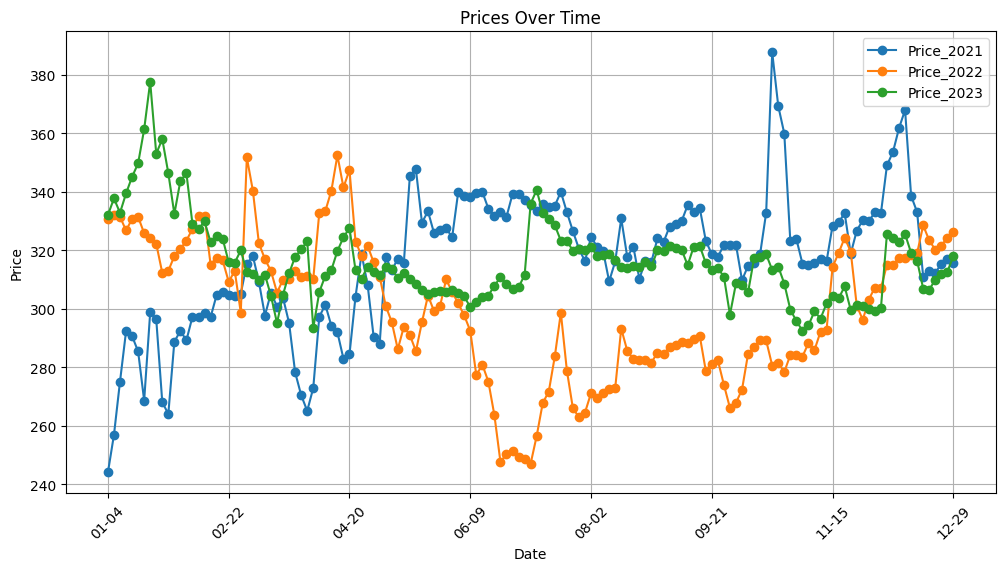

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the DataFrame
ax = df_all.plot(kind='line', marker='o', title='Prices Over Time', ax= ax)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better readability
plt.show()